# Voorbereiding

In [1]:
import os
import json
import asyncio

import traitlets

import numpy as np
import pandas as pd

import ipywidgets as widgets 
from ipywidgets import interact, interact_manual, Layout

import time
from datetime import datetime, timedelta

from storingsanalyse import StoringsAnalyse
from storingsanalyse_v2 import StoringsAnalyse as StoringsAnalyseV2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure

from IPython.display import Markdown, Latex

from document_generator import DocumentGeneratorCoentunnel

In [2]:
class LoadedButton(widgets.Button):
    """A button that can holds a value as a attribute."""

    def __init__(self, value=None, *args, **kwargs):
        super(LoadedButton, self).__init__(*args, **kwargs)
        # Create the value attribute.
        self.add_traits(value=traitlets.Any(value))


# Aparte functie voor het wachten op verandering (aka input van de ME)
def wait_for_change(widget):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True) 
        # we need to free up the binding to getvalue to avoid an InvalidState error
        # buttons don't support unobserve
        # so use `remove=True` 
    widget.on_click(getvalue)
    return future

In [3]:
""" In the line bellow fill in your API key without < and > """ 
api_key = 'bWF4YWRtaW46R21iQ1dlbkQyMDE5' # provided to you by a Maximo Consultant

""" In the line bellow fill in the desired object structure """
obj_struct = 'MXWO_SND' # name of the Maximo object structure

""" In the line bellow fill in the PO number and the SITEID without the < and > """
query = 'siteid="CT1EN2" and worktype="COR" and reportdate>="2018-01-01T00:00:00-00:00" and reportdate<="2018-03-30T00:00:00-00:00"'

In [4]:
input_project = widgets.Dropdown(
    options=["Coentunnel-tracé", "Sluis Eefde"],
    value="Coentunnel-tracé",
    description='Project:',
    disabled=False)

input_rapport_type = widgets.Dropdown(
    options=["Kwartaalrapportage", "Jaarrapportage"],
    description='Rapport type:',
    disabled=False)

input_quarter = widgets.Dropdown(
    options=["n.v.t.", "Q1", "Q2", "Q3", "Q4"],
    value='Q2',
    description='Kwartaal:',
    disabled=False)

input_api_key = widgets.Text(
    value='bWF4YWRtaW46R21iQ1dlbkQyMDE5',
    placeholder='Type something',
    description='API key:',
    disabled=False,
    layout=Layout(width='50%'))

input_path_staging_file = widgets.Text(
    placeholder='Path to the Staging File',
    value='..\\staging file\\validating_input_data.xlsx',
    description='Pad naar Staging File:',
    disabled=False,
    layout=Layout(width='50%'))

display(input_project, input_rapport_type, input_quarter, input_api_key, input_path_staging_file)

Dropdown(description='Project:', options=('Coentunnel-tracé', 'Sluis Eefde'), value='Coentunnel-tracé')

Dropdown(description='Rapport type:', options=('Kwartaalrapportage', 'Jaarrapportage'), value='Kwartaalrapport…

Dropdown(description='Kwartaal:', index=2, options=('n.v.t.', 'Q1', 'Q2', 'Q3', 'Q4'), value='Q2')

Text(value='bWF4YWRtaW46R21iQ1dlbkQyMDE5', description='API key:', layout=Layout(width='50%'), placeholder='Ty…

Text(value='..\\staging file\\validating_input_data.xlsx', description='Pad naar Staging File:', layout=Layout…

In [5]:
sa = StoringsAnalyseV2(project=input_project.value, 
                       rapport_type=input_rapport_type.value, 
                       quarter=input_quarter.value,
                       year=datetime.now().year,
                       api_key=input_api_key.value, 
                       path_to_staging_file=input_path_staging_file.value)

# DocumentGenerator instance
dg = DocumentGeneratorCoentunnel(project=input_project.value, 
                       rapport_type=input_rapport_type.value, 
                       quarter=input_quarter.value,
                       year=datetime.now().year,
                       api_key=input_api_key.value, 
                       path_to_staging_file=input_path_staging_file.value)

In [6]:
sf_data = sa.staging_file_data

### Aanpassen van de staging_file -- DEZE STAP WORDT VERWIJDERD IN DE TOEKOMST
Het opbouwen van deze automatische storingsanalyse vraagt om een ingevulde kolom 'type melding'. Om het process van opbouwen niet te laten stagneren op dit aspect, wordt er hieronder fictive data gegenereerd. Met behulp van de fictieve data wordt het genereren van de verschillende tabellen en grafieken gebouwd.

#### Dataset opvullen met fictieve data

In [7]:
# from random import randrange

# lijst_opties = ['Storing', 'Incident', 'Preventief', 'Onterecht']
# random_ranges = [lijst_opties[randrange(0, 4, 1)] for _ in range(len(sf_data['type melding (Storing/Incident/Preventief/Onterecht)']))]
# sf_data.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'] = random_ranges

In [8]:
# lijst_opties = ['P01', 'P02', 'P03', 'P04', 'P05', 'P06', 'P07', 'P08', 'P09', 'P10', 'P11', np.nan]
# random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['probleem code']))]
# sf_data.loc[:, 'probleem code'] = random_ranges

In [9]:
# lijst_opties = ['C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', np.nan]
# random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oorzaak code']))]
# sf_data.loc[:, 'oorzaak code'] = random_ranges

In [10]:
# lijst_opties = ['S01', 'S02', 'S03', 'S04', 'S05', 'S06', 'S07', 'S08', np.nan]
# random_ranges = [lijst_opties[randrange(0, len(lijst_opties), 1)] for _ in range(len(sf_data['oplos code']))]
# sf_data.loc[:, 'oplos code'] = random_ranges

In [11]:
# sf_data.iloc[:5, 15:25]

In [12]:
# # changing the di_numbers from '45-10' to '45'
# new_num = []
# for num in sf_data['sbs']:
#     if num is np.nan:
#         new_num.append(num)
#     else:
#         new_num.append(sa._isolate_di_number(str(num)))

# sf_data.loc[:, 'sbs'] = new_num

#### Aanpassing van afwijkende variabelen
- Terecht = Storing gerealiseerd in het document zelf
- '00' = '0' 

In [13]:
# sf_data.replace(to_replace='00', value='0', inplace=True)

In [14]:
# sa.split_staging_file()

# Analyse

## Aantallen meldingen

### Aantal meldingen per maand

In [15]:
# Data voor in tekst ophalen
totaal_aantal_meldingen = len(sf_data.index)

meldingen_per_maand = sf_data['month_number'].value_counts()

gemiddelde_per_maand = sum(meldingen_per_maand) / len(meldingen_per_maand)

max_meldingen_maand = sa.get_min_max_months(meldingen_per_maand.to_dict(), min_max='max')
min_meldingen_maand = sa.get_min_max_months(meldingen_per_maand.to_dict(), min_max='min')

# data_2019 = [key for key in sa.metadata.meldingen().keys() if '2019' in key]
# meldingen_2019 = sa.metadata.sum_values(dictionary=sa.meldingen, keys=data_2019)

# jaarlijks_gemiddelde = sa.metadata.avg_yearly(dictionary=sa.metadata.meldingen(), exclude_year='2020')

maanden = sa.metadata.get_month_list(exclude_year='2020')
maandelijks_gemiddelde = sa.metadata.avg_monthly(dictionary=sa.metadata.meldingen(), exclude_keys=maanden)

kwartaal_gemiddelde = sa.metadata.avg_quarterly(dictionary=sa.metadata.meldingen())

# tekst opbouwen + afbeelden 
tekst = f"""
Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
bijlage 1: “Aantal meldingen per maand”.

Uit de grafiek valt het volgende te constateren:

• Het totaal aantal meldingen in Q1 2021 : **{totaal_aantal_meldingen}** 

• Het gemiddelde aantal meldingen per maand : **{gemiddelde_per_maand}** 

• Hoogste aantal meldingen in de maand{'en' if len(max_meldingen_maand) > 1 else ''} **{', '.join(max_meldingen_maand)}** : **{max(meldingen_per_maand)}**

• Laagste aantal meldingen in de maand{'en' if len(min_meldingen_maand) > 1 else ''} **{', '.join(min_meldingen_maand)}** : **{min(meldingen_per_maand)}**

• Het gemiddelde aantal meldingen per maand vanaf **{sa.project_start_date}**: **{maandelijks_gemiddelde}**

• Het gemiddelde aantal meldingen per kwartaal vanaf **{sa.project_start_date}**: **{kwartaal_gemiddelde}**
"""
display(Markdown(tekst))


Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
bijlage 1: “Aantal meldingen per maand”.

Uit de grafiek valt het volgende te constateren:

• Het totaal aantal meldingen in Q1 2021 : **109** 

• Het gemiddelde aantal meldingen per maand : **36.333333333333336** 

• Hoogste aantal meldingen in de maanden **April, Juni** : **38**

• Laagste aantal meldingen in de maand **Mei** : **33**

• Het gemiddelde aantal meldingen per maand vanaf **01-2016**: **35.98412698412698**

• Het gemiddelde aantal meldingen per kwartaal vanaf **01-2016**: **107.95238095238095**


In [16]:
# Aantal meldingen in voorgaande q
voorgaande_q = sa.quarter_sequence.get_prev_val(sa.quarter)
voorgaand_jaar = str(int(sa.year) - 1)
mlist = sa.metadata.get_keys(dictionary=sa.metadata.meldingen(), containing_quarter=[voorgaande_q], containing_year=[voorgaand_jaar])
meldingen_gefilterd = sa.metadata.filter_dictionary_keys(dictionary=sa.metadata.meldingen(), keys=mlist)
totaal_meldingen_voorgaand_kwartaal = sa.metadata.sum_values(meldingen_gefilterd)

# Aantal meldingen in zelfde q voorgaand jaar
mlist = sa.metadata.get_keys(dictionary=sa.metadata.meldingen(),containing_quarter=[sa.quarter], containing_year=[voorgaand_jaar])
meldingen_gefilterd = sa.metadata.filter_dictionary_keys(dictionary=sa.metadata.meldingen(), keys=mlist)
totaal_meldingen_zelfde_kwartaal = sa.metadata.sum_values(meldingen_gefilterd)

tekst = f"""
In **{sa.quarter}** **{voorgaand_jaar}** waren in totaal **{totaal_meldingen_zelfde_kwartaal}** meldingen gemaakt. In **{sa.quarter}** **{sa.year}** zijn er **{totaal_aantal_meldingen-totaal_meldingen_zelfde_kwartaal}** meldingen 
meer t.o.v. **{sa.quarter}** **{voorgaand_jaar}**. 
 
In **{voorgaande_q}** **{sa.year}** waren in totaal **{totaal_meldingen_voorgaand_kwartaal}** meldingen gemaakt. In **{sa.quarter}** **{sa.year}** zijn er **{totaal_aantal_meldingen-totaal_meldingen_voorgaand_kwartaal}** meldingen 
meer t.o.v. **{voorgaande_q}** **{sa.year}**. 
"""
display(Markdown(tekst))


In **Q2** **2020** waren in totaal **89** meldingen gemaakt. In **Q2** **2021** zijn er **20** meldingen 
meer t.o.v. **Q2** **2020**. 
 
In **Q1** **2021** waren in totaal **60** meldingen gemaakt. In **Q2** **2021** zijn er **49** meldingen 
meer t.o.v. **Q1** **2021**. 


### Aantal meldingen per subsysteem 

In [17]:
df = sa.meldingen.copy()
# unieke types vastlegen
unique_types = list(df.loc[:, 'sbs'].unique())

sbs_count = df.loc[:, 'sbs'].value_counts()

input_threshhold = widgets.IntSlider(
    value=3,
    min=sbs_count.min(),
    max=sbs_count.max(),
    step=1,
    description='Drempelwaarde:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=dict(description_width='initial')
)

display(input_threshhold)

IntSlider(value=3, continuous_update=False, description='Drempelwaarde:', max=25, min=1, style=SliderStyle(des…

In [18]:
# sbs nummers die verwerkt moeten worden
sbs_to_process = [x for x in sbs_count.index if sbs_count.at[x] >= input_threshhold.value]

# lijst met rijen die verwerkt moeten worden
rows2process = list()
for sbs in sbs_to_process:
    meldingen_per_sbs = sbs_count[sbs]
    percentage_storing = round((meldingen_per_sbs / sum(sbs_count)) * 100, 2)
    line = f"{sa._get_breakdown_description(sbs)}\t- {meldingen_per_sbs} meldingen ({percentage_storing}% van het totale aantal meldingen)"
    rows2process.append(line)

# notification type
ntypes = list(df.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'].unique())
print(ntypes)

ntype_count = df.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'].value_counts()
print(ntype_count)

n2p = list()
for n in ntypes:
    line = f"{ntype_count[n]} meldingen zijn gecategoriseerd als {n}."
    n2p.append(line)

# '\' is not allowed as character in a f-string like bellow. reason for newline and tab
newline = '\n'
tab = '\t'

tekst=f"""
Er wordt en Pareto analyse gemaakt van het totaal aantal meldingen per subsysteem. Deze is toegevoegd als bijlage 1. 
 
Uit de pareto blijkt dat in **{sa.quarter}** **{voorgaand_jaar}** een totaal van **{totaal_aantal_meldingen}** meldingen zijn gemeld, intern 
dan wel extern. Voor het overzicht zijn de meldingen bekeken met **{input_threshhold.value}** of meer 
meldingen. Dit is de top **{len(sbs_to_process)}** en heeft een totaal van **{sum(sbs_count[sbs_to_process])}** meldingen van de in totaal 
**{totaal_aantal_meldingen}** (dit is **{round((sum(sbs_count[sbs_to_process])/totaal_aantal_meldingen) * 100, 2)}**% van het totaal). 
Hieronder staan de deelinstallatie**{'s' if len(sbs_to_process) > 1 else ''}**:


{''.join((newline + '**-' + tab + line + '**' + newline for line in rows2process))}


De **{totaal_aantal_meldingen}** van **{sa.quarter}** **{sa.year}** zijn als volgt onder te verdelen:

{''.join((newline + '**-' + tab + ntype_line + '**' + newline for ntype_line in n2p))}

"""
display(Markdown(tekst))

['Storing', 'Onterecht', 'Preventief', 'Incident']
Storing       56
Onterecht     32
Preventief    18
Incident       3
Name: type melding (Storing/Incident/Preventief/Onterecht), dtype: int64



Er wordt en Pareto analyse gemaakt van het totaal aantal meldingen per subsysteem. Deze is toegevoegd als bijlage 1. 
 
Uit de pareto blijkt dat in **Q2** **2020** een totaal van **109** meldingen zijn gemeld, intern 
dan wel extern. Voor het overzicht zijn de meldingen bekeken met **3** of meer 
meldingen. Dit is de top **10** en heeft een totaal van **88** meldingen van de in totaal 
**109** (dit is **80.73**% van het totaal). 
Hieronder staan de deelinstallatie**s**:



**-		- 25 meldingen (22.94% van het totale aantal meldingen)**

**-	Afsluitbomen (AB)	- 18 meldingen (16.51% van het totale aantal meldingen)**

**-	CCTV-camerasysteem	- 8 meldingen (7.34% van het totale aantal meldingen)**

**-	Verplaatsbare vangrail (VEVA)	- 8 meldingen (7.34% van het totale aantal meldingen)**

**-	LS-laagspanning	- 7 meldingen (6.42% van het totale aantal meldingen)**

**-	Openbare verlichting (OV)	- 6 meldingen (5.5% van het totale aantal meldingen)**

**-	Calamiteiten doorsteek (CaDo)	- 6 meldingen (5.5% van het totale aantal meldingen)**

**-	Centrale brandstof voorziening	- 4 meldingen (3.67% van het totale aantal meldingen)**

**-	Brandblusinstallatie tunnel en hulpposten	- 3 meldingen (2.75% van het totale aantal meldingen)**

**-	Verkeerssignaleringssysteem (MTM)	- 3 meldingen (2.75% van het totale aantal meldingen)**



De **109** van **Q2** **2021** zijn als volgt onder te verdelen:


**-	56 meldingen zijn gecategoriseerd als Storing.**

**-	32 meldingen zijn gecategoriseerd als Onterecht.**

**-	18 meldingen zijn gecategoriseerd als Preventief.**

**-	3 meldingen zijn gecategoriseerd als Incident.**




## Aantallen storingen

### Aantal storingen per maand

In [19]:
totaal_aantal_storingen = len(sa.storingen.index)

storingen_per_maand = sa.storingen['month_number'].value_counts()

gemiddelde_per_maand = sum(storingen_per_maand) / len(storingen_per_maand) if len(storingen_per_maand) != 0 else 0

max_storingen_maand = sa.get_min_max_months(storingen_per_maand.to_dict(), min_max='max')
min_storingen_maand = sa.get_min_max_months(storingen_per_maand.to_dict(), min_max='min')

data_2019 = [key for key in sa.metadata.storingen().keys() if '2019' in key]
storingen_2019 = sa.metadata.sum_values(dictionary=sa.storingen, keys=data_2019)

jaarlijks_gemiddelde = sa.metadata.avg_yearly(dictionary=sa.metadata.storingen(), exclude_year='2020')

maanden = sa.metadata.get_month_list(exclude_year='2020')
maandelijks_gemiddelde = sa.metadata.avg_monthly(dictionary=sa.metadata.storingen(), exclude_keys=maanden)

kwartaal_gemiddelde = sa.metadata.avg_quarterly(dictionary=sa.metadata.storingen())

# Tekst opbouwen + afbeelden
tekst = f"""
Om te kunnen bepalen of een trend waarneembaar is in het aantal storingen per 
maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
bijlage 1: “Aantal storingen per maand”.

Uit de grafiek valt het volgende te constateren:

• Het totaal aantal storingen in Q1 2021 : **{totaal_aantal_storingen}**

• Het gemiddelde aantal storingen per maand : **{gemiddelde_per_maand}**

• Hoogste aantal storingen in de maand{'en' if len(max_storingen_maand) > 1 else ''} **{', '.join(max_storingen_maand)}** : **{max(storingen_per_maand)}**

• Laagste aantal storingen in de maand{'en' if len(min_storingen_maand) > 1 else ''} **{', '.join(min_storingen_maand)}** : **{min(storingen_per_maand)}**

• Het gemiddelde aantal storingen per maand vanaf **{sa.project_start_date}**: **{maandelijks_gemiddelde}**

• Het gemiddelde aantal storingen per kwartaal vanaf **{sa.project_start_date}**: **{kwartaal_gemiddelde}**
"""
display(Markdown(tekst))


Om te kunnen bepalen of een trend waarneembaar is in het aantal storingen per 
maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
bijlage 1: “Aantal storingen per maand”.

Uit de grafiek valt het volgende te constateren:

• Het totaal aantal storingen in Q1 2021 : **56**

• Het gemiddelde aantal storingen per maand : **18.666666666666668**

• Hoogste aantal storingen in de maand **Mei** : **20**

• Laagste aantal storingen in de maand **April** : **17**

• Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

• Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**


In [20]:
# Aantal storingen in voorgaande q
voorgaande_q = sa.quarter_sequence.get_prev_val(sa.quarter)
voorgaand_jaar = str(int(sa.year) - 1)
mlist = sa.metadata.get_keys(dictionary=sa.metadata.storingen(), containing_quarter=[voorgaande_q], containing_year=[voorgaand_jaar])
storingen_gefilterd = sa.metadata.filter_dictionary_keys(dictionary=sa.metadata.storingen(), keys=mlist)
totaal_storingen_voorgaand_kwartaal = sa.metadata.sum_values(storingen_gefilterd)

# Aantal storingen in zelfde q voorgaand jaar
mlist = sa.metadata.get_keys(dictionary=sa.metadata.storingen(),containing_quarter=[sa.quarter], containing_year=[voorgaand_jaar])
storingen_gefilterd = sa.metadata.filter_dictionary_keys(dictionary=sa.metadata.storingen(), keys=mlist)
totaal_storingen_zelfde_kwartaal = sa.metadata.sum_values(storingen_gefilterd)

tekst = f"""
In **{sa.quarter}** **{voorgaand_jaar}** waren in totaal **{totaal_storingen_zelfde_kwartaal}** storingen gemaakt. In **{sa.quarter}** **{sa.year}** zijn er **{totaal_aantal_storingen - totaal_storingen_zelfde_kwartaal}** storingen 
meer t.o.v. **{sa.quarter}** **{voorgaand_jaar}**. 

In **{voorgaande_q}** **{sa.year}** waren in totaal **{totaal_storingen_voorgaand_kwartaal}** storingen gemaakt. In **{sa.quarter}** **{sa.year}** zijn er **{totaal_aantal_storingen - totaal_storingen_voorgaand_kwartaal}** storingen 
meer t.o.v. **{voorgaande_q}** **{sa.year}**. 
"""
display(Markdown(tekst))


In **Q2** **2020** waren in totaal **52** storingen gemaakt. In **Q2** **2021** zijn er **4** storingen 
meer t.o.v. **Q2** **2020**. 

In **Q1** **2021** waren in totaal **31** storingen gemaakt. In **Q2** **2021** zijn er **25** storingen 
meer t.o.v. **Q1** **2021**. 


### Aantal storingen per subsysteem

In [21]:
df = sa.storingen.copy()

# unieke types vastlegen
unique_types = list(df.loc[:, 'sbs'].unique())

sbs_count = df.loc[:, 'sbs'].value_counts(dropna=False)

sbs_to_process = [x for x in sbs_count.index if sbs_count.at[x] >= input_threshhold.value]

r2p = list()
for sbs in sbs_to_process:
    storingen_per_sbs = sbs_count[sbs]
    percentage_storing = round((storingen_per_sbs / sum(sbs_count)) * 100, 2)
    line = f"{sa._get_breakdown_description(sbs)}\t- {storingen_per_sbs} storingen ({percentage_storing}% van het totale aantal storingen)"
    r2p.append(line)

# '\' is not allowed as character in a f-string like bellow. reason for newline and tab
newline = '\n'
tab = '\t'

tekst = f"""
Er wordt en Pareto analyse gemaakt van het totaal aantal storingen per subsysteem. Deze is toegevoegd als bijlage. 

Uit de pareto blijkt dat in **{sa.quarter}** **{sa.year}** een totaal van **{totaal_aantal_storingen}** storingen zijn gemeld, intern 
dan wel extern. Voor het overzicht zijn de storingen bekeken met **{input_threshhold.value}** of meer 
storingen. Dit is de top **{len(sbs_to_process)}** en heeft een totaal van **{sum(sbs_count[sbs_to_process])}** storingen van de in totaal 
**{totaal_aantal_storingen}** (dit is **{round((sum(sbs_count[sbs_to_process]) / totaal_aantal_storingen) * 100, 2)}**% van het totaal). 
Hieronder staan de deelinstallatie**{'s' if len(sbs_to_process) > 1 else ''}**:

{''.join((newline + '**-' + tab + line + '**' + newline for line in r2p))}

In totaal hebben **{len(sbs_count)}** deelsystemen **{min(sbs_count)}** of meerdere storingen gehad in **{sa.quarter}** **{sa.year}**.

"""
display(Markdown(tekst))


Er wordt en Pareto analyse gemaakt van het totaal aantal storingen per subsysteem. Deze is toegevoegd als bijlage. 

Uit de pareto blijkt dat in **Q2** **2021** een totaal van **56** storingen zijn gemeld, intern 
dan wel extern. Voor het overzicht zijn de storingen bekeken met **3** of meer 
storingen. Dit is de top **7** en heeft een totaal van **36** storingen van de in totaal 
**56** (dit is **64.29**% van het totaal). 
Hieronder staan de deelinstallatie**s**:


**-		- 6 storingen (10.71% van het totale aantal storingen)**

**-	CCTV-camerasysteem	- 6 storingen (10.71% van het totale aantal storingen)**

**-	LS-laagspanning	- 6 storingen (10.71% van het totale aantal storingen)**

**-	Openbare verlichting (OV)	- 6 storingen (10.71% van het totale aantal storingen)**

**-	Afsluitbomen (AB)	- 5 storingen (8.93% van het totale aantal storingen)**

**-	Centrale brandstof voorziening	- 4 storingen (7.14% van het totale aantal storingen)**

**-	Brandblusinstallatie tunnel en hulpposten	- 3 storingen (5.36% van het totale aantal storingen)**


In totaal hebben **21** deelsystemen **1** of meerdere storingen gehad in **Q2** **2021**.



# Conclusie / aanbeveling

## Combineren van de POO data met de staging_file (moet nog naar backend verplaatst worden)

In [22]:
poo_data_meta = sa.metadata.poo_data().copy()
staging_file_data = sa.meldingen
for poo in poo_data_meta.keys():
    # Exception in workflow for oplos code -> an definitive solution is needed when generating the staging file
    col2read = sa.metadata.return_poo_type_string(poo)
    value_count = staging_file_data[col2read].value_counts(dropna=False).to_dict()
    if np.nan in value_count:
        value_count["Leeg"] = value_count[np.nan]
        del value_count[np.nan]
    else:
        value_count["Leeg"] = 0

    key = str(sa.quarter) + '_' + str(sa.year)
    new_poo_type_data = {key: value_count}

    poo_data_meta[poo] = dict(**poo_data_meta[poo], **new_poo_type_data)

poo_from_meta = poo_data_meta

## Algemeen

In [23]:
sbs_count = df.loc[:, 'sbs'].value_counts(dropna=False)

tekst = f"""
Er heeft een analyse van de storingen plaatsgevonden. Uit deze analyse is niet 
naar voren gekomen dat verbeteren aan het onderhoudsplan en/of procedures en/of 
hardware noodzakelijk zijn om het faalgedrag te verbeteren. 
 
Alle meldingen moeten aan een asset / sub niveau van een DI worden gekoppeld. 
Zodat altijd is te herleiden wat precies is gefaald. Aan alle meldingen is een DI 
gekoppeld. Aan **{max(sbs_count[sbs_count.index.isnull()].values) if len(sbs_count[sbs_count.index.isnull()]) != 0 else 0}** werkorders zit geen sbs nummer gekoppeld. (zie besluit 5). 
 
De meldingen zijn gekoppeld aan een probleem, oorzaak en oplossing. 
 
Vanaf 1 september 2018 heeft een update plaats gevonden van het 
onderhoudsmanagementsysteem. Bij deze update is het invullen van probleem, 
oorzaak en oplossing toegevoegd in het systeem. Vanaf Q4 2018 zal dit ook 
worden meegenomen in de analyse. In de volgende paragrafen staat de uitwerking 
hiervan. Daarbij zie je het aantal van het huidige jaar, het totaal aantal en het 
gemiddelde per Q vanaf Q4 2018.
"""
display(Markdown(tekst))


Er heeft een analyse van de storingen plaatsgevonden. Uit deze analyse is niet 
naar voren gekomen dat verbeteren aan het onderhoudsplan en/of procedures en/of 
hardware noodzakelijk zijn om het faalgedrag te verbeteren. 
 
Alle meldingen moeten aan een asset / sub niveau van een DI worden gekoppeld. 
Zodat altijd is te herleiden wat precies is gefaald. Aan alle meldingen is een DI 
gekoppeld. Aan **0** werkorders zit geen sbs nummer gekoppeld. (zie besluit 5). 
 
De meldingen zijn gekoppeld aan een probleem, oorzaak en oplossing. 
 
Vanaf 1 september 2018 heeft een update plaats gevonden van het 
onderhoudsmanagementsysteem. Bij deze update is het invullen van probleem, 
oorzaak en oplossing toegevoegd in het systeem. Vanaf Q4 2018 zal dit ook 
worden meegenomen in de analyse. In de volgende paragrafen staat de uitwerking 
hiervan. Daarbij zie je het aantal van het huidige jaar, het totaal aantal en het 
gemiddelde per Q vanaf Q4 2018.


### Probleem

In [24]:
probleem_code_count = sf_data['probleem code'].value_counts(dropna=False).to_dict()
oorzaak_code_count = sf_data['oorzaak code'].value_counts(dropna=False).to_dict()
oplossing_code_count = sf_data['oplossing code'].value_counts(dropna=False).to_dict()

meta_probleem = sa.metadata.poo_data()['probleem']
meta_oorzaak = sa.metadata.poo_data()['oorzaak']
meta_oplossing = sa.metadata.poo_data()['oplossing']

poo_beschrijvingen = sa.metadata.contract_info()['POO_codes']

for poo_type in [probleem_code_count, oorzaak_code_count, oplossing_code_count]:
    if np.nan in poo_type.keys():
        poo_type['Leeg'] = poo_type.pop(np.nan)

probleem_avg_table = sa.metadata.poo_avg_table(meta_probleem, poo_type='probleem')
oorzaak_avg_table = sa.metadata.poo_avg_table(meta_oorzaak, poo_type='oorzaak')
oplossing_avg_table = sa.metadata.poo_avg_table(meta_oplossing, poo_type='oplossing')

In [25]:
probleem_code_count = sf_data['probleem code'].value_counts(dropna=False).to_dict()
oorzaak_code_count = sf_data['oorzaak code'].value_counts(dropna=False).to_dict()
oplossing_code_count = sf_data['oplossing code'].value_counts(dropna=False).to_dict()

probleem_avg_table = sa.metadata.poo_avg_table(meta_probleem, poo_type='probleem')
oorzaak_avg_table = sa.metadata.poo_avg_table(meta_oorzaak, poo_type='oorzaak')
oplossing_avg_table = sa.metadata.poo_avg_table(meta_oplossing, poo_type='oplossing')

poo_beschrijvingen = sa.metadata.contract_info()['POO_codes']

In [26]:
line_dict = dict()
for code in (k for k in poo_beschrijvingen.keys() if 'P' in k or k == 'Leeg'):    
    code_counts = list()
    for q in meta_probleem.keys():
        if code in meta_probleem[q].keys():
            code_counts.append(sa.metadata.sum_values(dictionary=meta_probleem[q], keys=[code]))
        else:
            code_counts.append(0)
    
    totaal = sum(code_counts)
    if code not in probleem_code_count.keys():
        line = ''.join((newline + '|' + code + '|' + poo_beschrijvingen[code] + '|' + str(0) + '|' + str(totaal) + '|' + str(probleem_avg_table[code]) + '|'))
        line_dict[code] = line
        continue
    
    line = ''.join((newline + '|' + code + '|' + poo_beschrijvingen[code] + '|' + str(probleem_code_count[code]) + '|' + str(totaal + probleem_code_count[code]) + '|' + str(probleem_avg_table[code]) + '|'))
    line_dict[code] = line
    
tekst = f"""
|Probleem|Beschrijving|Aantal|Totaal|Gemiddelde|
|--------|------------|------|------|----------|{''.join((line_dict[code] for code in line_dict.keys()))}
"""
display(Markdown(tekst))


|Probleem|Beschrijving|Aantal|Totaal|Gemiddelde|
|--------|------------|------|------|----------|
|P01|Niet beschikbaar|4|111|10.7|
|P02|Geen / slecht / afwijkend beeld|2|56|5.4|
|P03|Aangereden|6|50|4.4|
|P04|In storing|15|133|11.8|
|P05|Blijft hangen|2|35|3.3|
|P06|Fatale fout|0|25|2.5|
|P07|Gewenste stand komt niet overeen (niet mogelijk)|0|9|0.9|
|P08|Geen communicatie (mogelijk)|3|13|1.0|
|P09|Oproep actief|1|4|0.3|
|P10|Niet bedienbaar|0|17|1.7|
|P11|Overige|55|288|23.3|
|Leeg|Niet ingevuld|21|183|16.2|


In [27]:
display(Markdown(dg.build_poo_table(dg.get_poo_table_data(poo_type='probleem'))))

|Probleem|Beschrijving|Aantal|Totaal|Gemiddelde|
                  |--------|------------|------|------|----------|
|P01|Niet beschikbaar|4|111|10.7|
|P02|Geen / slecht / afwijkend beeld|2|56|5.4|
|P03|Aangereden|6|50|4.4|
|P04|In storing|15|133|11.8|
|P05|Blijft hangen|2|35|3.3|
|P06|Fatale fout|0|25|2.5|
|P07|Gewenste stand komt niet overeen (niet mogelijk)|0|9|0.9|
|P08|Geen communicatie (mogelijk)|3|13|1.0|
|P09|Oproep actief|1|4|0.3|
|P10|Niet bedienbaar|0|17|1.7|
|P11|Overige|55|288|23.3|
|Leeg|Niet ingevuld|21|183|16.2|

### Oorzaak

In [28]:
line_dict = dict()
for code in (k for k in poo_beschrijvingen.keys() if 'C' in k or k == 'Leeg'):   
    code_counts = list()
    for q in meta_oorzaak.keys():
        if code in meta_oorzaak[q].keys():
            code_counts.append(sa.metadata.sum_values(dictionary=meta_oorzaak[q], keys=[code]))
        else:
            code_counts.append(0)
    
    totaal = sum(code_counts)
    
    if code not in oorzaak_code_count.keys():
        line = ''.join((newline + '|' + code + '|' + poo_beschrijvingen[code] + '|' + str(0) + '|' + str(totaal) + '|' + str(oorzaak_avg_table[code]) + '|'))
        line_dict[code] = line
        continue
    
    line = ''.join((newline + '|' + code + '|' + poo_beschrijvingen[code] + '|' + str(oorzaak_code_count[code]) + '|' + str(totaal + oorzaak_code_count[code]) + '|' + str(oorzaak_avg_table[code]) + '|'))
    line_dict[code] = line

tekst = f"""
|Oorzaak|Beschrijving|Aantal|Totaal|Gemiddelde|
|-------|------------|------|------|----------|{''.join((line_dict[code] for code in line_dict.keys()))}
"""
display(Markdown(tekst))


|Oorzaak|Beschrijving|Aantal|Totaal|Gemiddelde|
|-------|------------|------|------|----------|
|Leeg|Niet ingevuld|36|216|18.0|
|C01|Corrosie|0|4|0.4|
|C02|Mechanische slijtage, - breuk, - vervorming|3|17|1.4|
|C03|Molest / diefstal|0|3|0.3|
|C04|Ongedierte|2|2|0|
|C05|Schade|3|15|1.2|
|C06|Random / software / applicatie fout|7|48|4.1|
|C07|Thermische vervorming|0|2|0.2|
|C08|Veroudering|15|114|9.9|
|C09|Vervuiling|0|7|0.7|
|C10|Weersomstandigheden|1|39|3.8|
|C11|Externe oorzaak|5|47|4.2|
|C12|Aanlegkwaliteit|4|7|0.3|
|C13|Overige|22|331|30.9|
|C14|Bedienfout|1|21|2.0|
|C15|Vocht|4|7|0.3|
|C16|Incident|6|41|3.5|


In [29]:
display(Markdown(dg.build_poo_table(dg.get_poo_table_data(poo_type='oorzaak'))))

|Probleem|Beschrijving|Aantal|Totaal|Gemiddelde|
                  |--------|------------|------|------|----------|
|Leeg|Niet ingevuld|36|216|18.0|
|C01|Corrosie|0|4|0.4|
|C02|Mechanische slijtage, - breuk, - vervorming|3|17|1.4|
|C03|Molest / diefstal|0|3|0.3|
|C04|Ongedierte|2|2|0|
|C05|Schade|3|15|1.2|
|C06|Random / software / applicatie fout|7|48|4.1|
|C07|Thermische vervorming|0|2|0.2|
|C08|Veroudering|15|114|9.9|
|C09|Vervuiling|0|7|0.7|
|C10|Weersomstandigheden|1|39|3.8|
|C11|Externe oorzaak|5|47|4.2|
|C12|Aanlegkwaliteit|4|7|0.3|
|C13|Overige|22|331|30.9|
|C14|Bedienfout|1|21|2.0|
|C15|Vocht|4|7|0.3|
|C16|Incident|6|41|3.5|

### Oplossing

In [30]:
line_dict = dict()
for code in (k for k in poo_beschrijvingen.keys() if 'S' in k or k == 'Leeg'):
    code_counts = list()
    for q in meta_oplossing.keys():
        if code in meta_oplossing[q].keys():
            code_counts.append(sa.metadata.sum_values(dictionary=meta_oplossing[q], keys=[code]))
        else:
            code_counts.append(0)

    totaal = sum(code_counts)
    
    if code not in oplossing_code_count.keys():
        line = ''.join((newline + '|' + code + '|' + poo_beschrijvingen[code] + '|' + str(0) + '|' + str(totaal) + '|' + str(oplossing_avg_table[code]) + '|'))
        line_dict[code] = line
        continue
        
    line = ''.join((newline + '|' + code + '|' + poo_beschrijvingen[code] + '|' + str(oplossing_code_count[code]) + '|' + str(totaal + oplossing_code_count[code]) + '|' + str(oplossing_avg_table[code]) + '|'))
    line_dict[code] = line

tekst = f"""
|Oplossing|Beschrijving|Aantal|Totaal|Gemiddelde|
|---------|------------|------|------|----------|{''.join((line_dict[code] for code in line_dict.keys()))}
"""
display(Markdown(tekst))


|Oplossing|Beschrijving|Aantal|Totaal|Gemiddelde|
|---------|------------|------|------|----------|
|Leeg|Niet ingevuld|36|216|18.0|
|S01|Reinigen|6|16|1.0|
|S02|Vervangen|26|270|24.4|
|S03|Resetten|9|182|17.3|
|S04|Afstellen/vastzetten|4|28|2.4|
|S05|Bijvullen|1|3|0.2|
|S06|Repareren|4|15|1.1|
|S07|Smeren / bijvullen / bijwerken|1|3|0.2|
|S08|Overige|22|188|16.6|


In [31]:
display(Markdown(dg.build_poo_table(dg.get_poo_table_data(poo_type='oplossing'))))

|Probleem|Beschrijving|Aantal|Totaal|Gemiddelde|
                  |--------|------------|------|------|----------|
|Leeg|Niet ingevuld|36|216|18.0|
|S01|Reinigen|6|16|1.0|
|S02|Vervangen|26|270|24.4|
|S03|Resetten|9|182|17.3|
|S04|Afstellen/vastzetten|4|28|2.4|
|S05|Bijvullen|1|3|0.2|
|S06|Repareren|4|15|1.1|
|S07|Smeren / bijvullen / bijwerken|1|3|0.2|
|S08|Overige|22|188|16.6|

## Storingen per deelinstallatie uitgewerkt

In [32]:
df = sa.meldingen.copy()
# unieke types vastlegen
unique_types = list(df.loc[:, 'sbs'].unique())

sbs_count = df.loc[:, 'sbs'].value_counts()

input_threshhold = widgets.IntSlider(
    value=3,
    min=sbs_count.min(),
    max=sbs_count.max(),
    step=1,
    description='Drempelwaarde:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=dict(description_width='initial')
)

display(input_threshhold)

IntSlider(value=3, continuous_update=False, description='Drempelwaarde:', max=25, min=1, style=SliderStyle(des…

In [33]:
# prep
_group_data_to_print = dict()

sf_data_groupby_sbs = sa.storingen.copy().groupby('sbs')

for group in sf_data_groupby_sbs.groups:
    group_data = sf_data_groupby_sbs.get_group(group).copy()
    
    totaal_aantal_storingen = len(group_data.index)
    if totaal_aantal_storingen < input_threshhold.value:
        continue

    storingen_per_maand = group_data['month_number'].value_counts()

    gemiddelde_per_maand = sum(storingen_per_maand) / len(storingen_per_maand)

    max_storingen_maand = sa.get_min_max_months(storingen_per_maand.to_dict(), min_max='max')
    min_storingen_maand = sa.get_min_max_months(storingen_per_maand.to_dict(), min_max='min')

#     data_2019 = [key for key in sa.metadata.storingen().keys() if '2019' in key]
#     storingen_2019 = sa.metadata.sum_values(dictionary=sa.storingen, keys=data_2019)

#     jaarlijks_gemiddelde = sa.metadata.avg_yearly(dictionary=sa.metadata.storingen(), exclude_year='2020')

    maanden = sa.metadata.get_month_list(exclude_year='2020')
    maandelijks_gemiddelde = sa.metadata.avg_monthly(dictionary=sa.metadata.storingen(), exclude_keys=maanden)

    kwartaal_gemiddelde = sa.metadata.avg_quarterly(dictionary=sa.metadata.storingen())
    
    data_to_print = {"totaal_aantal_storingen": totaal_aantal_storingen,
                     "gemiddelde_per_maand": gemiddelde_per_maand,
                     "max_storingen_maand": max_storingen_maand,
                     "min_storingen_maand": min_storingen_maand,
                     "max_storingen_per_maand": max(storingen_per_maand),
                     "min_storingen_per_maand":  min(storingen_per_maand),
                     "maandelijks_gemiddelde_start_project": maandelijks_gemiddelde,
                     "kwartaal_gemiddelde": kwartaal_gemiddelde,
                     "start_date": sa.project_start_date}
    
    _group_data_to_print[group] = data_to_print

sorted_keys = sorted(_group_data_to_print, key=lambda item: _group_data_to_print[item]['totaal_aantal_storingen'], reverse=True)
group_data_to_print = {key: _group_data_to_print[key] for key in sorted_keys}

# print
texts2print = []

for group, data in group_data_to_print.items():
    print(f'\nsubsystem {group}\n{data}\n')
    _tekst = f"""
    # {str(group)}
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie {group}
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **{data["start_date"]}**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **{sa.quarter}** **{sa.year}** : **{data["totaal_aantal_storingen"]}**

    • Het gemiddelde aantal storingen per maand : **{data["gemiddelde_per_maand"]}**

    • Hoogste aantal storingen in de maand{'en' if len(data["max_storingen_maand"]) > 1 else ''} **{', '.join(data["max_storingen_maand"])}** : **{data["max_storingen_per_maand"]}**

    • Laagste aantal storingen in de maand{'en' if len(data["min_storingen_maand"]) > 1 else ''} **{', '.join(data["min_storingen_maand"])}** : **{data["min_storingen_per_maand"]}**

    • Het gemiddelde aantal storingen per maand vanaf **{data["start_date"]}**: **{data["maandelijks_gemiddelde_start_project"]}**

    • Het gemiddelde aantal storingen per kwartaal vanaf **{data["start_date"]}**: **{data["kwartaal_gemiddelde"]}**{newline}
    """
    texts2print.append(_tekst)

tekst = f"""
{''.join((t for t in texts2print))}
"""
display(Markdown(tekst))


subsystem 0
{'totaal_aantal_storingen': 6, 'gemiddelde_per_maand': 2.0, 'max_storingen_maand': ['Mei'], 'min_storingen_maand': ['April', 'Juni'], 'max_storingen_per_maand': 4, 'min_storingen_per_maand': 1, 'maandelijks_gemiddelde_start_project': 19.19047619047619, 'kwartaal_gemiddelde': 57.57142857142857, 'start_date': '01-2016'}


subsystem 13
{'totaal_aantal_storingen': 6, 'gemiddelde_per_maand': 3.0, 'max_storingen_maand': ['Juni'], 'min_storingen_maand': ['Mei'], 'max_storingen_per_maand': 5, 'min_storingen_per_maand': 1, 'maandelijks_gemiddelde_start_project': 19.19047619047619, 'kwartaal_gemiddelde': 57.57142857142857, 'start_date': '01-2016'}


subsystem 23
{'totaal_aantal_storingen': 6, 'gemiddelde_per_maand': 6.0, 'max_storingen_maand': ['Mei'], 'min_storingen_maand': ['Mei'], 'max_storingen_per_maand': 6, 'min_storingen_per_maand': 6, 'maandelijks_gemiddelde_start_project': 19.19047619047619, 'kwartaal_gemiddelde': 57.57142857142857, 'start_date': '01-2016'}


subsystem 61
{



    # 0
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 0
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **6**

    • Het gemiddelde aantal storingen per maand : **2.0**

    • Hoogste aantal storingen in de maand **Mei** : **4**

    • Laagste aantal storingen in de maanden **April, Juni** : **1**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    
    # 13
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 13
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **6**

    • Het gemiddelde aantal storingen per maand : **3.0**

    • Hoogste aantal storingen in de maand **Juni** : **5**

    • Laagste aantal storingen in de maand **Mei** : **1**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    
    # 23
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 23
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **6**

    • Het gemiddelde aantal storingen per maand : **6.0**

    • Hoogste aantal storingen in de maand **Mei** : **6**

    • Laagste aantal storingen in de maand **Mei** : **6**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    
    # 61
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 61
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **6**

    • Het gemiddelde aantal storingen per maand : **3.0**

    • Hoogste aantal storingen in de maanden **Mei, Juni** : **3**

    • Laagste aantal storingen in de maanden **Mei, Juni** : **3**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    
    # 45
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 45
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **5**

    • Het gemiddelde aantal storingen per maand : **2.5**

    • Hoogste aantal storingen in de maand **April** : **4**

    • Laagste aantal storingen in de maand **Mei** : **1**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    
    # 17
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 17
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **4**

    • Het gemiddelde aantal storingen per maand : **2.0**

    • Hoogste aantal storingen in de maanden **April, Juni** : **2**

    • Laagste aantal storingen in de maanden **April, Juni** : **2**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    
    # 51 EN 53
    Hieronder is een vergelijking gemaakt van het aantal storingen van deelinstallatie 51 EN 53
    t.o.v. andere kwartalen (hetzelfde kwartaal van vorig jaar en vorig kwartaal) en t.o.v. 
    het gemiddelde vanaf **01-2016**. 

    Uit de grafiek valt het volgende te constateren:

    • Het totaal aantal storingen in **Q2** **2021** : **3**

    • Het gemiddelde aantal storingen per maand : **3.0**

    • Hoogste aantal storingen in de maand **April** : **3**

    • Laagste aantal storingen in de maand **April** : **3**

    • Het gemiddelde aantal storingen per maand vanaf **01-2016**: **19.19047619047619**

    • Het gemiddelde aantal storingen per kwartaal vanaf **01-2016**: **57.57142857142857**

    


### -Note- Aanpassen
De sbs nummers worden niet aangepast omdat de staging file nu automatisch word ingelezen. Los dit op met een module aan te orepen in `__init__()` van StoringsAnalyse. Kijk ook hoe je in de toekomst om wilt gaan met de 

In [34]:
text = dg.build_aantal_per_subsysteem_per_maand(dg.get_aantal_per_subsysteem_per_maand(threshold=input_threshhold.value))
display(Markdown(text))

# 0 

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 6 

        • Het gemiddelde aantal storingen per maand : 2.0

        • Hoogste aantal storingen in de maand Mei: 4

        • Laagste aantal storingen in de maanden April, Juni: 1

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        
# 13 LS-laagspanning

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 6 

        • Het gemiddelde aantal storingen per maand : 3.0

        • Hoogste aantal storingen in de maand Juni: 5

        • Laagste aantal storingen in de maand Mei: 1

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        
# 23 Openbare verlichting (OV)

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 6 

        • Het gemiddelde aantal storingen per maand : 6.0

        • Hoogste aantal storingen in de maand Mei: 6

        • Laagste aantal storingen in de maand Mei: 6

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        
# 61 CCTV-camerasysteem

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 6 

        • Het gemiddelde aantal storingen per maand : 3.0

        • Hoogste aantal storingen in de maanden Mei, Juni: 3

        • Laagste aantal storingen in de maanden Mei, Juni: 3

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        
# 45 Afsluitbomen (AB)

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 5 

        • Het gemiddelde aantal storingen per maand : 2.5

        • Hoogste aantal storingen in de maand April: 4

        • Laagste aantal storingen in de maand Mei: 1

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        
# 17 Centrale brandstof voorziening

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 4 

        • Het gemiddelde aantal storingen per maand : 2.0

        • Hoogste aantal storingen in de maanden April, Juni: 2

        • Laagste aantal storingen in de maanden April, Juni: 2

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        
# 51 EN 53 Brandblusinstallatie tunnel en hulpposten

        Om te kunnen bepalen of een trend waarneembaar is in het aantal meldingen per 
        maand, wordt als onderdeel van deze rapportage een grafiek toegevoegd. Zie 
        bijlage: “Aantal storingen per maand”.

        Uit de grafiek valt het volgende te constateren:

        • Het totaal aantal storingen in Q2 2021 : 3 

        • Het gemiddelde aantal storingen per maand : 3.0

        • Hoogste aantal storingen in de maand April: 3

        • Laagste aantal storingen in de maand April: 3

        • Het gemiddelde aantal storingen per maand vanaf 01-2016: 19.19047619047619

        • Het gemiddelde aantal storingen per kwartaal vanaf 01-2016: 57.57142857142857
        


# Assets met de meeste meldingen

## Algemeen

In [35]:
meldingen_per_asset = sf_data['asset nummer'].value_counts()
meldingen_per_asset = meldingen_per_asset.reset_index()
meldingen_per_asset.rename(columns={"asset nummer": "count", "index": "asset nummer"}, inplace=True)

list_descriptions = {sf_data['asset nummer'][index]: sf_data['asset beschrijving'][index] for index in range(sf_data.shape[0])} 


asset_beschrijvingen = []
for index, row in meldingen_per_asset.iterrows():
    asset_num = row[0]
    if asset_num in list_descriptions.keys():
        asset_beschrijvingen.append(list_descriptions[asset_num])

meldingen_per_asset.at[:, 'asset beschrijving'] = asset_beschrijvingen

# ophalen van de sbs nummers van de assets
sbs_dict = dict()
for asset_num in meldingen_per_asset.loc[:, 'asset nummer'].to_dict().values():
    row = sf_data[sf_data.loc[:, 'asset nummer'] == asset_num]
    sbs_dict[asset_num] = row['sbs'].unique()[0]

In [36]:
input_threshhold = widgets.IntSlider(
    value=3,  # meldingen_per_asset['count'].min()
    min=meldingen_per_asset['count'].min(),
    max=meldingen_per_asset['count'].max(),
    step=1,
    description='Drempelwaarde:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=dict(description_width='initial')
)

display(input_threshhold)

IntSlider(value=3, continuous_update=False, description='Drempelwaarde:', max=7, min=1, style=SliderStyle(desc…

In [37]:
lines = list()
lines2handle = meldingen_per_asset[meldingen_per_asset['count'] >= input_threshhold.value]
for r in lines2handle.iterrows():
    row = r[1]
    line = ''.join((newline + '|' + str(sa._get_breakdown_description(sbs_dict[row[0]])) + '|' + str(row[-1]) + '|' + str(row[1]) + '|'))
    lines.append(line)
    
tekst = f"""
De hieronder benoemde assets, zijn de **{len(lines)}** assets die **{input_threshhold.value}** of meer meldingen hebben 
gehad in **{sa.quarter}** **{sa.year}**: 

|Deelinstallatie|Asset|Aantal|
|---------------|-----|------|{''.join((line for line in lines))}
"""
display(Markdown(tekst))


De hieronder benoemde assets, zijn de **2** assets die **3** of meer meldingen hebben 
gehad in **Q2** **2021**: 

|Deelinstallatie|Asset|Aantal|
|---------------|-----|------|
|Verplaatsbare vangrail (VEVA)|A08 VEVA 0,816q TBR (VB) - VEVA boom|7|
|CCTV-camerasysteem|61W802 - CCTV-kast2 DG-Z -1.12|3|


In [38]:
text = dg.build_asset_meeste_ntype_algemeen(dg.get_asset_meeste_ntype_algemeen(threshold=input_threshhold.value))
display(Markdown(text))

|Deelinstallatie|Asset|Aantal|
                  |---------------|-----|------|
|Verplaatsbare vangrail (VEVA)|A08 VEVA 0,816q TBR (VB) - VEVA boom|7|
|CCTV-camerasysteem|61W802 - CCTV-kast2 DG-Z -1.12|3|

## Uitwerking meldingen

Hieronder wordt paragraaf 2.2.1 uitgewerkt per deelinstallatie.

In [39]:
# onderstaande is een andere variablele dat hiervoor is gebruikt
_meldingen_per_asset = sf_data['asset nummer'].value_counts(dropna=False)

meldingen_na = _meldingen_per_asset.loc[np.nan] if np.nan in _meldingen_per_asset else 0

_meldingen_per_asset = _meldingen_per_asset[(x is not np.nan for x in list(_meldingen_per_asset.index))]
_meldingen_per_asset = _meldingen_per_asset.loc[_meldingen_per_asset >= input_threshhold.value]


cols2present = ['werkorder', 'status', 'rapport datum',
                'werkorder beschrijving', 'sbs',
                'sbs omschrijving', 'locatie', 'locatie omschrijving', 'probleem code', 'beschrijving probleem',
                'oorzaak code', 'beschrijving oorzaak', 'oplossing code',
                'beschrijving oplossing', 'uitgevoerde werkzaamheden',
                'type melding (Storing/Incident/Preventief/Onterecht)']

tekst = f"""
De assets met **{input_threshhold.value}** of meer meldingen zijn hieronder uitgewerkt: 

Bij de **{meldingen_na}** meldingen is geen asset gekoppeld aan de werkorder.
"""
display(Markdown(tekst))

for asset in list(_meldingen_per_asset.index):
    df = sa.meldingen[sa.meldingen["asset nummer"] == asset].copy().reset_index()
    _tekst = f"""De **{len(df)}** meldingen van {df.loc[0, 'asset beschrijving']} worden hieronder gepresenteerd.""" 
    display(Markdown(_tekst))
    display(df.loc[:, cols2present])
    display(Markdown(f'{newline}'))


De assets met **3** of meer meldingen zijn hieronder uitgewerkt: 

Bij de **49** meldingen is geen asset gekoppeld aan de werkorder.


De **7** meldingen van A08 VEVA 0,816q TBR (VB) - VEVA boom worden hieronder gepresenteerd.

,werkorder,status,rapport datum,werkorder beschrijving,sbs,sbs omschrijving,locatie,locatie omschrijving,probleem code,beschrijving probleem,oorzaak code,beschrijving oorzaak,oplossing code,beschrijving oplossing,uitgevoerde werkzaamheden,type melding (Storing/Incident/Preventief/Onterecht)
0,1725344,SLUIT,2021-04-05 22:09:00,D3840645 Er is een VeVa aangereden. Men wil gr...,46B,NaN,NaN,NaN,P03,VeVa aangereden,C16,NaN,S04,inspecteren en testen,Storing ontvangen op 05-04-2021 om 22:09 met d...,Incident
1,1728513,SLUIT,2021-04-05 22:09:00,VEVA CT2-N-02 Schade onderzoek N.A.V. D3840645,46B,NaN,NaN,NaN,P03,VeVa aangereden,C16,NaN,S06,NaN,13-4-2021: Heeft Tjebbe-Jan contact gehad met ...,Onterecht
2,1733413,SLUIT,2021-04-05 22:09:00,VEVA CT2-N02 bezoek firma Microtechniek N.A.V....,46B,NaN,NaN,NaN,P11,aanrijding veva na inspectie,C16,NaN,S08,inspectie,Op 12-6-21 8:0 is Microtechniek op locatie gew...,Onterecht
3,1733449,SLUIT,2021-04-05 22:09:00,VEVA CT2-N02 beheersmaatregel vulringen integr...,46B,NaN,NaN,NaN,P03,VeVa aangereden,C16,NaN,S06,NaN,20-5-2021 Michael Hoonakker:\nMaterialen zijn ...,Onterecht
4,1733818,GVU,2021-04-05 22:09:00,VEVA CT2-N02 lekkage lucht balg verhelpen N.A....,46B,NaN,NaN,NaN,Leeg,VeVa aangereden,Leeg,NaN,Leeg,NaN,3-5-2021 Michael Hoonakker: Tijdens de inspect...,Onterecht
5,1735886,SLUIT,2021-04-05 22:09:00,VEVA CT2-N02 beheersmaatregel vergrendelpennen...,46B,NaN,NaN,NaN,P03,VeVa aangereden,C16,NaN,S02,2 pennen vervangen,Op 12-6-21 7:0 tijdens een weekend afsluiting ...,Onterecht
6,173708,WGK,2021-04-05 22:09:00,Bezoek firma Kaufman t.b.v. inspectie schade,46B,NaN,NaN,NaN,Leeg,VeVa aangereden,Leeg,NaN,Leeg,NaN,NaN,Onterecht


De **3** meldingen van 61W802 - CCTV-kast2 DG-Z -1.12 worden hieronder gepresenteerd.

,werkorder,status,rapport datum,werkorder beschrijving,sbs,sbs omschrijving,locatie,locatie omschrijving,probleem code,beschrijving probleem,oorzaak code,beschrijving oorzaak,oplossing code,beschrijving oplossing,uitgevoerde werkzaamheden,type melding (Storing/Incident/Preventief/Onterecht)
0,1733820,SLUIT,2021-05-27 07:00:00,Eigen constatering software fout DBOS sever 3,61,NaN,1259,NaN,P04,DBOS server 3 slaat beelden niet meer goed op,C06,NaN,S02,NaN,Storing geconstateerd na onderzoek van opgetre...,Storing
1,1733821,SLUIT,2021-05-27 07:00:00,Eigen constatering software fout DBOS sever 2,61,NaN,1259,NaN,P04,DBOS server 2 heeft configuratie fout,C06,NaN,S02,NaN,Storing geconstateerd na onderzoek van opgetre...,Storing
2,1735636,ADMG,2021-05-31 07:00:00,eigen constatering 2 Harde schijven defect fai...,61,NaN,1259,NaN,P04,2 harde schijven defect van Raid 6 dus geen da...,C02,NaN,S02,NaN,Tijdens controle van het systeem constateerde ...,Storing


In [40]:
text = dg.build_asset_uitwerking_ntypes(dg.get_asset_uitwerking_ntypes(threshold=input_threshhold.value))
display(Markdown(text))

De assets met 3 of meer meldingen zijn hieronder uitgewerkt: 

        Bij de C5506    7
C2894    3
Name: asset nummer, dtype: int64 meldingen is geen asset gekoppeld aan de werkorder.
        
De 7 meldingen van A08 VEVA 0,816q TBR (VB) - VEVA boom worden hieronder gepresenteerd.
                       
   werkorder status       rapport datum  \
0    1725344  SLUIT 2021-04-05 22:09:00   
1    1728513  SLUIT 2021-04-05 22:09:00   
2    1733413  SLUIT 2021-04-05 22:09:00   
3    1733449  SLUIT 2021-04-05 22:09:00   
4    1733818    GVU 2021-04-05 22:09:00   
5    1735886  SLUIT 2021-04-05 22:09:00   
6     173708    WGK 2021-04-05 22:09:00   

                              werkorder beschrijving  sbs  sbs omschrijving  \
0  D3840645 Er is een VeVa aangereden. Men wil gr...  46B               NaN   
1     VEVA CT2-N-02 Schade onderzoek N.A.V. D3840645  46B               NaN   
2  VEVA CT2-N02 bezoek firma Microtechniek N.A.V....  46B               NaN   
3  VEVA CT2-N02 beheersmaatregel vulringen integr...  46B               NaN   
4  VEVA CT2-N02 lekkage lucht balg verhelpen N.A....  46B               NaN   
5  VEVA CT2-N02 beheersmaatregel vergrendelpennen...  46B               NaN   
6       Bezoek firma Kaufman t.b.v. inspectie schade  46B               NaN   

  locatie  locatie omschrijving probleem code         beschrijving probleem  \
0     NaN                   NaN           P03               VeVa aangereden   
1     NaN                   NaN           P03               VeVa aangereden   
2     NaN                   NaN           P11  aanrijding veva na inspectie   
3     NaN                   NaN           P03               VeVa aangereden   
4     NaN                   NaN          Leeg               VeVa aangereden   
5     NaN                   NaN           P03               VeVa aangereden   
6     NaN                   NaN          Leeg               VeVa aangereden   

  oorzaak code beschrijving oorzaak oplossing code beschrijving oplossing  \
0          C16                  NaN            S04  inspecteren en testen   
1          C16                  NaN            S06                    NaN   
2          C16                  NaN            S08              inspectie   
3          C16                  NaN            S06                    NaN   
4         Leeg                  NaN           Leeg                    NaN   
5          C16                  NaN            S02     2 pennen vervangen   
6         Leeg                  NaN           Leeg                    NaN   

                           uitgevoerde werkzaamheden  \
0  Storing ontvangen op 05-04-2021 om 22:09 met d...   
1  13-4-2021: Heeft Tjebbe-Jan contact gehad met ...   
2  Op 12-6-21 8:0 is Microtechniek op locatie gew...   
3  20-5-2021 Michael Hoonakker:\nMaterialen zijn ...   
4  3-5-2021 Michael Hoonakker: Tijdens de inspect...   
5  Op 12-6-21 7:0 tijdens een weekend afsluiting ...   
6                                                NaN   

  type melding (Storing/Incident/Preventief/Onterecht)  
0                                           Incident    
1                                          Onterecht    
2                                          Onterecht    
3                                          Onterecht    
4                                          Onterecht    
5                                          Onterecht    
6                                          Onterecht    

De 3 meldingen van 61W802 - CCTV-kast2 DG-Z -1.12 worden hieronder gepresenteerd.
                       
   werkorder status       rapport datum  \
0    1733820  SLUIT 2021-05-27 07:00:00   
1    1733821  SLUIT 2021-05-27 07:00:00   
2    1735636   ADMG 2021-05-31 07:00:00   

                              werkorder beschrijving sbs  sbs omschrijving  \
0      Eigen constatering software fout DBOS sever 3  61               NaN   
1      Eigen constatering software fout DBOS sever 2  61               NaN   
2  eigen constatering 2 Harde schijven defect fai...  61               NaN   

  locatie  locatie omschrijving probleem code  \
0    1259                   NaN           P04   
1    1259                   NaN           P04   
2    1259                   NaN           P04   

                               beschrijving probleem oorzaak code  \
0      DBOS server 3 slaat beelden niet meer goed op          C06   
1              DBOS server 2 heeft configuratie fout          C06   
2  2 harde schijven defect van Raid 6 dus geen da...          C02   

  beschrijving oorzaak oplossing code beschrijving oplossing  \
0                  NaN            S02                    NaN   
1                  NaN            S02                    NaN   
2                  NaN            S02                    NaN   

                           uitgevoerde werkzaamheden  \
0  Storing geconstateerd na onderzoek van opgetre...   
1  Storing geconstateerd na onderzoek van opgetre...   
2  Tijdens controle van het systeem constateerde ...   

  type melding (Storing/Incident/Preventief/Onterecht)  
0                                            Storing    
1                                            Storing    
2                                            Storing    


## Conclusie

In [41]:
tekst = f"""
Als wordt gekeken naar de oorzaken van de meldingen van de **{len(lines)}** assets welke **{input_threshhold.value}** of 
meerdere meldingen hebben gehad, is bij somige assets repeterend en bij andere 
tekens verschillen.  
 
Het falen van deze assets hoeft niet verder worden bekeken of worden onderzocht. 
Dit omdat deze al reeds zijn behandeld bij de verschillende systemen. 
"""
display(Markdown(tekst))


Als wordt gekeken naar de oorzaken van de meldingen van de **2** assets welke **3** of 
meerdere meldingen hebben gehad, is bij somige assets repeterend en bij andere 
tekens verschillen.  
 
Het falen van deze assets hoeft niet verder worden bekeken of worden onderzocht. 
Dit omdat deze al reeds zijn behandeld bij de verschillende systemen. 


In [42]:
text = dg.build_asset_conclusie(dg.get_asset_meeste_ntype_algemeen(threshold=input_threshhold.value))
display(Markdown(text))

Als wordt gekeken naar de oorzaken van de meldingen van de 2 assets welke 3 of 
        meerdere meldingen hebben gehad, is bij somige assets repeterend en bij andere telkens verschillen.  

        Het falen van deze assets hoeft niet verder worden bekeken of worden onderzocht. 
        Dit omdat deze al reeds zijn behandeld bij de verschillende systemen. 
        

# Updated van de opgeslagen data (metadata)

Zoals vermeld moeten deze stappend beide naar de backend verplaatst worden. de meest algemene implementatie moet in metadata-class komen.
In StoringsAnalyse moet deze algemene module op maat gemaakt worden voor de storingsanalyse.

## Combineren van de historische data met de staging file (moet nog naar backend verplaatst worden)

In [43]:
# meldingen
meldingen_from_sf = sa.meldingen.copy()
meldingen_from_meta = sa.metadata.meldingen()

meldingen_from_sf = meldingen_from_sf.groupby(['month_number'])

"""
De meldnigen zonder di nummer worden door Remko nu anagepast zodat ze toch een di nummer hebben.
"""
new_data_for_meta = {}
for group in meldingen_from_sf.groups:
    dff = meldingen_from_sf.get_group(group)
    vc = dff['sbs'].value_counts().to_dict()
    key = f'0{group}_{sa.year}' if group < 10 else f'{group}_{sa.year}'
    new_data_for_meta[key] = dff['sbs'].value_counts().to_dict()
    

# dev_case had historical data up until 03_2021, so TypeError because of overlapping keys Q1 for 2021
updated_meta_meldingen = dict(**meldingen_from_meta, **new_data_for_meta)
# updated_meta_meldingen = dict(**meldingen_from_meta)


In [44]:
# storingen
storingen_from_sf = sa.storingen.copy()
storingen_from_meta = sa.metadata.storingen()

storingen_from_sf = storingen_from_sf.groupby(['month_number'])

new_data_for_meta_storingen = {}
for group in storingen_from_sf.groups:
    dff = storingen_from_sf.get_group(group)
    vc = dff['sbs'].value_counts().to_dict()
    key = f'0{group}_{sa.year}' if group < 10 else f'{group}_{sa.year}'
    new_data_for_meta_storingen[key] = dff['sbs'].value_counts().to_dict()
    

# dev_case had historical data up until 03_2021, so TypeError because of overlapping keys Q1 for 2021
updated_meta_storingen = dict(**storingen_from_meta, **new_data_for_meta_storingen)
# updated_meta_storingen = dict(**storingen_from_meta)

# Bijlagen

## Aantal meldingen per deelinstallatie

_input_object:
(     werkorder  status           rapport datum  month_number  \
0      1725590   SLUIT 2021-04-14 08:14:16.429             4   
1      1725708   SLUIT 2021-04-14 15:42:16.828             4   
2      1733453   SLUIT 2021-05-21 09:36:11.103             5   
3      1720690   SLUIT 2021-04-01 08:06:15.007             4   
4      1733349   SLUIT 2021-05-12 18:30:00.000             5   
..         ...     ...                     ...           ...   
104    1735644  AFGEBR 2021-06-01 12:21:18.311             6   
105    1735896     WGK 2021-06-09 10:18:36.407             6   
106     173590    ADMG 2021-06-09 08:00:00.000             6   
107    1736997     GPL 2021-06-22 08:51:15.856             6   
108    1749344    ADMG 2021-06-28 09:30:33.136             6   

                                werkorder beschrijving asset nummer  \
0      3 x TL lampen zijn defect en Led lamp knippert.          NaN   
1                 Opname brandwerende bekleding oost 1          NaN   
2 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

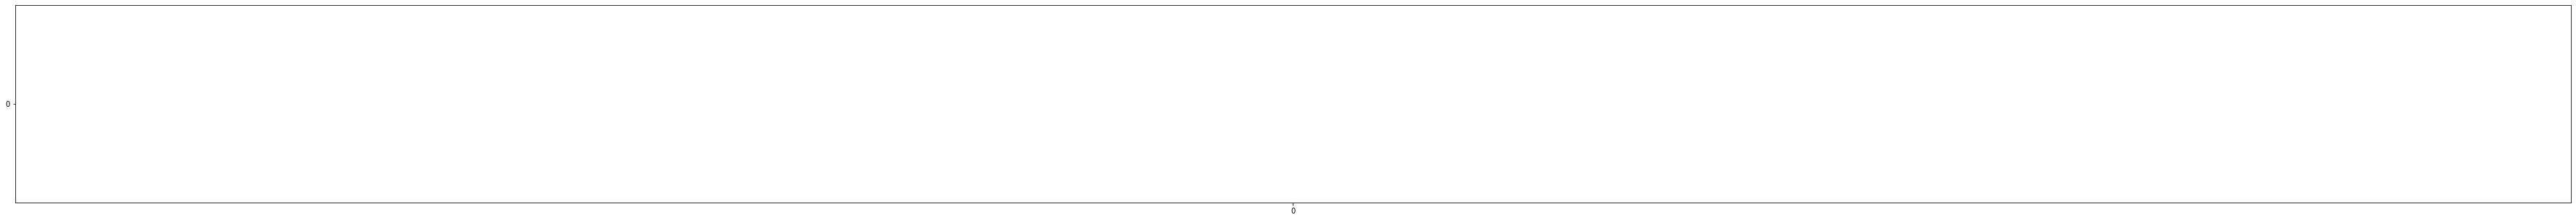

In [45]:
# prepping data
df = sf_data.copy()

input_data = (df, 'rapport datum', 'sbs')
time_range = [min(df['rapport datum']), max(df['rapport datum'])]
available_categories = sa.metadata.contract_info()['aanwezige_deelinstallaties']

# prepped_data = sa.prep(df, time_range, available_categories, time_key='rapport datum', category_key='sbs')
prepped_data = sa.test_prep(df, time_range, available_categories, time_key='rapport datum', category_key='sbs')
print('-'*100)
prepped_data_sorted = sa.test_prep(df, time_range, sorted(available_categories), time_key='rapport datum', category_key='sbs')

# plotting data
plot_type = 'stacked'
category_labels = available_categories.copy()
# needed to cover 'nan', else ValueError: shape mismatch: objects cannot be broadcast to a single shape
readable_labels = [sa.prettify_time_label(label) for label in sa.last_seen_bin_names]

sa.plot(input_data=prepped_data, plot_type='stacked', category_labels=categories, bin_labels=readable_labels)

In [ ]:
summary_data = sa.prep_summary(df, time_range, available_categories, time_key='rapport datum', category_key='sbs')
sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

## Aantal storingen per deelinstallatie

In [ ]:
# prepping data
df_s = sa.storingen.copy()

input_data = (df_s, 'rapport datum', 'sbs')
time_range = [min(df['rapport datum']), max(df['rapport datum'])]
available_categories = sa.metadata.contract_info()['aanwezige_deelinstallaties']

prepped_data = sa.prep(df_s, time_range, available_categories, time_key='rapport datum', category_key='sbs')

# plotting data
plot_type = 'stacked'
category_labels = available_categories.copy()
# needed to cover 'nan', else ValueError: shape mismatch: objects cannot be broadcast to a single shape
readable_labels = [sa.prettify_time_label(label) for label in sa.last_seen_bin_names]

sa.plot(input_data=prepped_data, plot_type='stacked', category_labels=category_labels, bin_labels=readable_labels)

In [ ]:
summary_data = sa.prep_summary(df_s, time_range, available_categories, time_key='rapport datum', category_key='sbs')
sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

## Aantal onterechte meldingen per deelinstallatie

In [ ]:
# prepping data
df_o = sa._isolate_notification_type(like_ntype='onterecht').copy()
input_data = (df_o, 'rapport datum', 'sbs')
time_range = [min(df['rapport datum']), max(df['rapport datum'])]
available_categories = sa.metadata.contract_info()['aanwezige_deelinstallaties']

prepped_data = sa.prep(df_o, time_range, available_categories, time_key='rapport datum', category_key='sbs')

# plotting data
plot_type = 'stacked'
category_labels = available_categories.copy()
# needed to cover 'nan', else ValueError: shape mismatch: objects cannot be broadcast to a single shape
readable_labels = [sa.prettify_time_label(label) for label in sa.last_seen_bin_names]

sa.plot(input_data=prepped_data, plot_type='stacked', category_labels=category_labels, bin_labels=readable_labels)

In [ ]:
summary_data = sa.prep_summary(df_o, time_range, available_categories, time_key='rapport datum', category_key='sbs')
sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

## Totaal aantal meldingen preventief per deelinstallatie

In [ ]:
# prepping data
df_p = sa._isolate_notification_type(like_ntype='preventief').copy()
input_data = (df_p, 'rapport datum', 'sbs')
time_range = [min(df['rapport datum']), max(df['rapport datum'])]
available_categories = sa.metadata.contract_info()['aanwezige_deelinstallaties']

prepped_data = sa.prep(df_p, time_range, available_categories, time_key='rapport datum', category_key='sbs')

# plotting data
plot_type = 'stacked'
category_labels = available_categories.copy()
# needed to cover 'nan', else ValueError: shape mismatch: objects cannot be broadcast to a single shape
readable_labels = [sa.prettify_time_label(label) for label in sa.last_seen_bin_names]

sa.plot(input_data=prepped_data, plot_type='stacked', category_labels=category_labels, bin_labels=readable_labels)

In [ ]:
summary_data = sa.prep_summary(df_p, time_range, available_categories, time_key='rapport datum', category_key='sbs')
sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

## Aantal incidenten per deelinstallatie

In [ ]:
# prepping data
df_i = sa._isolate_notification_type(like_ntype='incident').copy()
input_data = (df_i, 'rapport datum', 'sbs')
time_range = [min(df['rapport datum']), max(df['rapport datum'])]
available_categories = sa.metadata.contract_info()['aanwezige_deelinstallaties']

prepped_data = sa.prep(df_i, time_range, available_categories, time_key='rapport datum', category_key='sbs')

# plotting data
plot_type = 'stacked'
category_labels = available_categories.copy()
# needed to cover 'nan', else ValueError: shape mismatch: objects cannot be broadcast to a single shape
readable_labels = [sa.prettify_time_label(label) for label in sa.last_seen_bin_names]

sa.plot(input_data=prepped_data, plot_type='stacked', category_labels=category_labels, bin_labels=readable_labels)

In [ ]:
summary_data = sa.prep_summary(df_i, time_range, available_categories, time_key='rapport datum', category_key='sbs')
sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

## Vergelijking voorgaande kwartaal met huidinge kwartaal

### Meldingen

In [ ]:
prepped_data = sa.prep(updated_meta_meldingen, 
                       time_range=['10-2020', '03-2021'], 
                       available_categories=sa.metadata.contract_info()['aanwezige_deelinstallaties'], 
                       time_key='rapport datum', 
                       category_key='sbs', 
                       bin_size='quarter')

sa.plot(input_data=prepped_data, 
        plot_type='side-by-side', 
        category_labels=sa.metadata.contract_info()['aanwezige_deelinstallaties'], 
        bin_labels=sa.last_seen_bin_names)

In [ ]:
summary_data = sa.prep_summary(updated_meta_meldingen, 
                               time_range=['10-2020', '03-2021'], 
                               available_categories=sa.metadata.contract_info()['aanwezige_deelinstallaties'],
                               bin_size='quarter')

sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

### Storingen

In [ ]:
prepped_data = sa.prep(updated_meta_storingen, 
                       time_range=['10-2020', '03-2021'], 
                       available_categories=sa.metadata.contract_info()['aanwezige_deelinstallaties'], 
                       time_key='rapport datum', 
                       category_key='sbs', 
                       bin_size='quarter')

sa.plot(input_data=prepped_data, 
        plot_type='side-by-side', 
        category_labels=sa.metadata.contract_info()['aanwezige_deelinstallaties'], 
        bin_labels=[sa.prettify_time_label(label) for label in sa.last_seen_bin_names])

In [ ]:
summary_data = sa.prep_summary(updated_meta_storingen, 
                               time_range=['10-2020', '03-2021'], 
                               available_categories=sa.metadata.contract_info()['aanwezige_deelinstallaties'],
                               bin_size='quarter')

sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], data=summary_data.values())

## Verdeling type meldingen per deelinstallatie

In [ ]:
df = sa.meldingen.copy()

In [ ]:
input_threshhold = widgets.IntSlider(
    value=0,
    min=0,
    max=sbs_count.max(),
    step=1,
    description='Drempelwaarde:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    style=dict(description_width='initial')
)

display(input_threshhold)

In [ ]:
sbs_count = df.loc[:, 'sbs'].value_counts()
to_process = [x for x in sbs_count.index if sbs_count.at[x] >= input_threshhold.value]

df_groupby_sbs = df.groupby(['sbs'])

# unieke types vastlegen
unique_types = df.loc[:, 'type melding (Storing/Incident/Preventief/Onterecht)'].unique()

# cols kan voor een sandbox tool variabel gemaakt worden.
cols = ['type melding (Storing/Incident/Preventief/Onterecht)', 'month_number']

for di_num in to_process:
    prepped_data = sa.prep(df_groupby_sbs.get_group(di_num), 
                           time_range=['10-2020', '03-2021'], 
                           available_categories=unique_types, 
                           time_key='rapport datum', 
                           category_key='type melding (Storing/Incident/Preventief/Onterecht)')
    
    sa.plot(input_data=prepped_data, 
            plot_type='stacked', 
            category_labels=unique_types, 
            bin_labels=[sa.prettify_time_label(label) for label in sa.last_seen_bin_names])
    
    summary_data = sa.prep_summary(df_groupby_sbs.get_group(di_num), 
                                   time_range=['10-2020', '03-2021'], 
                                   available_categories=unique_types, 
                                   time_key='rapport datum', 
                                   category_key='type melding (Storing/Incident/Preventief/Onterecht)')

    sa.plot_summary(x_labels=[sa.prettify_time_label(label) for label in summary_data.keys()], 
                    data=summary_data.values())

# Afronding
In de afronding worden de laatste handelingen van de automatisering uitgevoerd, zoals het opslaan van de geüpdatette historische data en het exporteren van de inhoud van dit Notebook naar een [pdf, docx] bestand.

In [ ]:
updated_meta_meldingen, updated_meta_storingen, poo_from_meta

In [ ]:
sa.export_graphs(filename='THIS IS THE TEST EXPORT OF THE REAL DEAL.pdf')